# Exercícios

## Seguro

Utilizando o dataset _insurance.csv_ sobre precificação de seguro saúde para clientes, crie um modelo de Regressão Linear para que seja feita essa precificação.

In [1]:
import pandas as pd

insurance = pd.read_csv('insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df_ins_dumm=pd.get_dummies(insurance)

In [5]:
df_ins_dumm


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [6]:
df_ins_dumm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   uint8  
 5   sex_male          1338 non-null   uint8  
 6   smoker_no         1338 non-null   uint8  
 7   smoker_yes        1338 non-null   uint8  
 8   region_northeast  1338 non-null   uint8  
 9   region_northwest  1338 non-null   uint8  
 10  region_southeast  1338 non-null   uint8  
 11  region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 52.4 KB


In [7]:
df_ins_dumm.describe()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.494768,0.505232,0.795217,0.204783,0.242152,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.500160,0.403694,0.403694,0.428546,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df_ins_dumm.columns


Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [59]:
X = df_ins_dumm.drop('charges',axis=1)
y = df_ins_dumm[['charges']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#X_train, X_test, y_train, y_test = train_test_split(Xo, yo, test_size=0.3, random_state=42)


from sklearn.linear_model import Lasso, Ridge
linreg_lasso = Lasso(alpha = 50, max_iter=100, tol=0.1)
linreg_lasso.fit(X_train, y_train)
print(linreg_lasso.score(X_test, y_test))

linreg_ridge = Ridge(alpha = 50, max_iter=100, tol=0.1)
linreg_ridge.fit(X_train, y_train)
print(linreg_ridge.score(X_test, y_test))

0.7694615719941269
0.7686451439354864


In [30]:
linreg_ridge.get_params()

{'alpha': 50,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 100,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.1}

In [31]:
linreg_ridge.coef_

array([[ 3501.25166182,  1990.92432667,   505.44101152,   -31.62039873,
           31.62039873, -4667.90461915,  4667.90461915,   239.03773438,
           30.03516766,  -137.16785847,  -134.50470707]])

In [32]:
df_ins_dumm

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [34]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test)


regressor.coef_


from sklearn import metrics
metrics.r2_score(y_test, y_pred)

regressor.intercept_

LinearRegression()

In [25]:
y_pred

array([[25293.7130284 ],
       [ 3448.60283431],
       [ 6706.9884907 ],
       ...,
       [ 4149.13248568],
       [ 1246.58493898],
       [37085.62326757]])

In [23]:
std_residuals

,charges
0,-1.391276
1,-0.285087
2,-0.373519
3,3.016186
4,-0.285516
...,...
1333,-0.289675
1334,-0.216076
1335,-0.416831
1336,0.125971


In [24]:
residuals

,charges
0,-8408.789028
1,-1723.050534
2,-2257.526491
3,18229.640447
4,-1725.638186
...,...
1333,-1750.775386
1334,-1305.950009
1335,-2519.298986
1336,761.360061


In [51]:
import matplotlib.pyplot as plt
from scipy.stats import probplot

#fig,ax = plt.subplots()
#_,(_,_,_) = probplot(std_residuals, plot = ax, fit=True)
##y_train.plot(kind='scatter')
#plt.scatter(y_pred, y_test)
#plt.axhline(y=0, color='r', linestyle='-')

<AxesSubplot:>

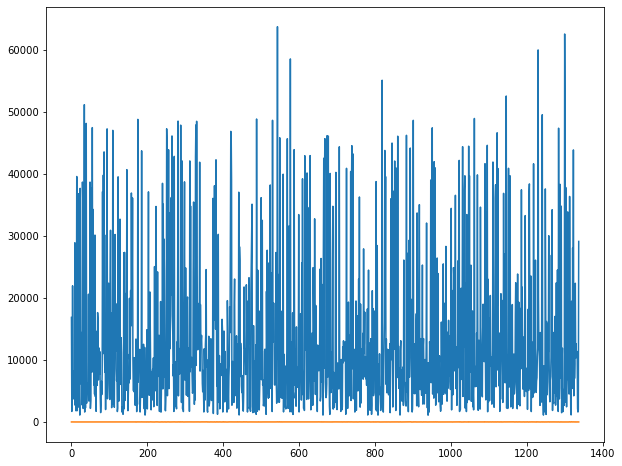

In [52]:
fig = plt.figure(figsize=(10,8))
df_ins_dumm.charges.plot()
df_ins_dumm.bmi.plot()

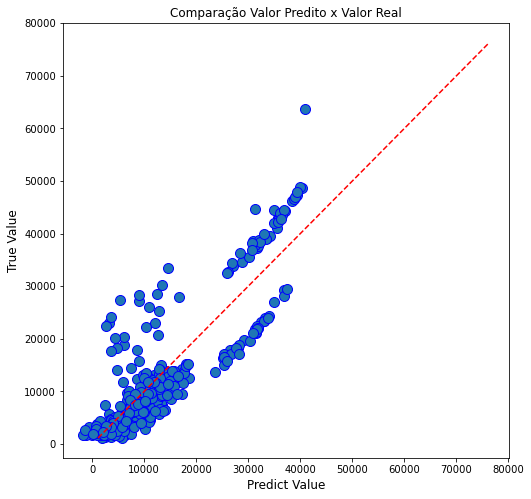

In [68]:
import numpy as np
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# mostra a reta diagonal, que representa a predição perfeita
xl = np.arange(min(y_test.charges), 1.2*max(y_test.charges),(max(y_test.charges)-min(y_test.charges))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show()

In [67]:
y_test

,charges
764,9095.06825
887,5272.17580
890,29330.98315
1293,9301.89355
259,33750.29180
...,...
701,9541.69555
672,4399.73100
1163,2200.83085
1103,11363.28320


## Admissão

No _dataset_ _Admission_Predict.csv_, temos dados sobre alunos indianos que desejam ingressar em uma universidade e entre as variáveis existem diversas métricas de desempenho deles. Utilizando a variável resposta "Chance de Admissão" (Chance of admit ), crie um modelo de regressão linear para esses dados.

In [53]:
admit = pd.read_csv('Admission_Predict.csv', index_col = 'Serial No.')
admit

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1,0.82
397,325,107,3,3.0,3.5,9.11,1,0.84
398,330,116,4,5.0,4.5,9.45,1,0.91


In [54]:
admit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 28.1 KB


In [55]:
admit.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [75]:
admit.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

<AxesSubplot:xlabel='Serial No.'>

<Figure size 720x1080 with 0 Axes>

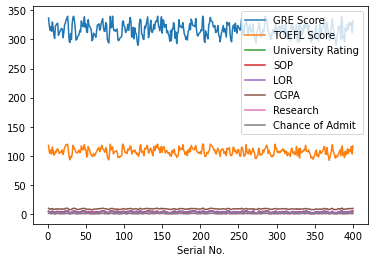

In [58]:
fig = plt.figure(figsize=(10,15))
admit.plot()

In [76]:
X = admit.drop('Chance of Admit ',axis=1)
y = admit[['Chance of Admit ']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#X_train, X_test, y_train, y_test = train_test_split(Xo, yo, test_size=0.3, random_state=42)




from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test)


regressor.coef_





In [79]:
from sklearn import metrics
metrics.r2_score(y_test, y_pred)



0.7955991554684619

In [80]:
regressor.intercept_

array([0.73035714])

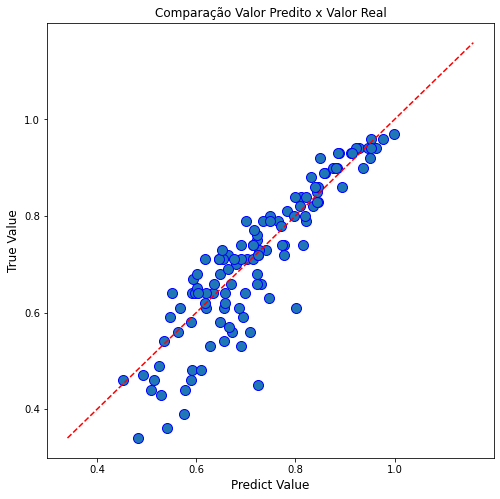

In [85]:
import numpy as np
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# mostra a reta diagonal, que representa a predição perfeita
xl = np.arange(min(y_test['Chance of Admit ']), 1.2*max(y_test['Chance of Admit ']),(max(y_test['Chance of Admit '])-min(y_test['Chance of Admit ']))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show()

## Diabetes

A partir das características apresentadas no dataset abaixo, crie um modelo de classificação para predizer se uma pessoa é ou não diabética (label).

In [86]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

data = pd.read_csv("diabetes.csv", header=0, names=col_names)
data

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [88]:
data.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [89]:
X = data.drop('label',axis=1)
y = data[['label']]

In [90]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#X_train, X_test, y_train, y_test = train_test_split(Xo, yo, test_size=0.3, random_state=42)




from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test)


regressor.coef_


C:\Users\TBS\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([[ 0.18823163,  1.13335776, -0.18631388, -0.02422067, -0.10468258,
         0.81150478,  0.14358094,  0.41370604]])

In [91]:
from sklearn.metrics import confusion_matrix, accuracy_score


In [92]:
confusion_matrix(y_pred,y_test)

array([[120,  30],
       [ 31,  50]], dtype=int64)

In [93]:
accuracy_score(y_pred, y_test)

0.7359307359307359

<AxesSubplot:xlabel='insulin', ylabel='label'>

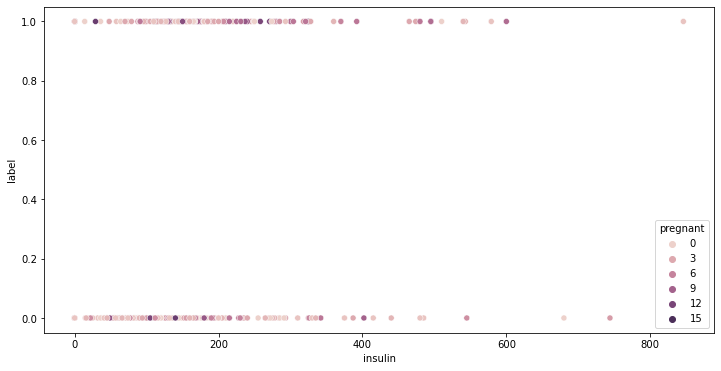

In [95]:
import seaborn as sns
# Scatter
fig = plt.figure(figsize = (12,6))
sns.scatterplot(data = data, x = "insulin", y="label", hue = "pregnant")

In [98]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

C:\Users\TBS\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=0)

In [99]:
def plot_classification_region(X_set, y_set, title, xlabel, ylabel):
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

    fig, ax = plt.subplots(figsize=(16,9))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

ValueError: X has 2 features per sample; expecting 8

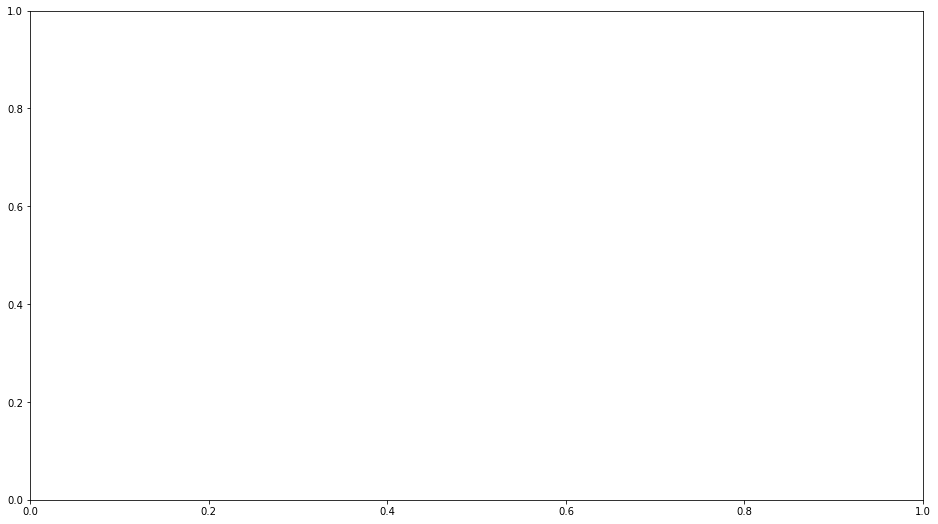

In [100]:
plot_classification_region(X_train,
                           y_train,
                           title = "Treino",
                           xlabel = "pregnant",
                           ylabel = "label")